## 1. Setup

In [ ]:
#import sys
#!{sys.executable} -m pip install <package list>

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## 2. Loading data 

In [15]:
df = pd.read_csv("regression_example/train.csv",index_col=0)

In [16]:
df.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


In [18]:
df.shape

(362, 16)

In [19]:
df.dtypes

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [50]:
target_var= ['life_expectancy']

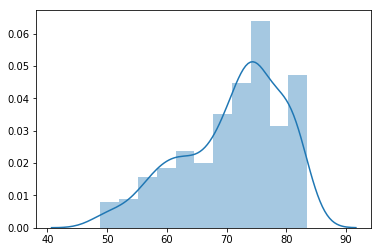

In [59]:
sns.distplot(df[target_var]);

In [56]:
categorical_var = list(df.select_dtypes(include=['object']).columns)

In [57]:
numeric_var = [x for x in list(df.columns) if x not in categorical_var and x not in target_var]

In [87]:
numeric_var

['surface_area',
 'agricultural_land',
 'forest_area',
 'armed_forces_total',
 'urban_pop_major_cities',
 'urban_pop_minor_cities',
 'inflation_annual',
 'inflation_monthly',
 'inflation_weekly',
 'secure_internet_servers_total']

In [84]:
df.describe()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


In [85]:
df_numeric=df.copy()[numeric_var]

In [86]:
df_numeric.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,NaN,NaN,NaN,NaN
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,NaN,0.581473,NaN,2.623624e+06
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,NaN,NaN,NaN,1.656589e+09
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,1.374906,NaN,NaN,6.625072e+08
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,-0.044229,NaN,NaN,2.832808e+07


In [88]:
df_categorical=df.copy()[categorical_var]

In [89]:
df_categorical.head()

,national_income,mobile_subscriptions,internet_users,improved_sanitation,women_parliament_seats_rate
0,unknown,less than 1 per person,0 per 1000 people,high access,[0%-25%)
1,very low,less than 1 per person,154 per 1000 people,low access,[0%-25%)
2,unknown,more than 1 per person,90 per 100 people,no info,unknown
3,high,more than 1 per person,76 per 100 people,very high access,[25%-50%)
4,unknown,more than 1 per person,350 per 1000 people,very high access,[25%-50%)


In [101]:
df_labels = df.copy()[target_var].copy()

In [102]:
df_labels.head()

,life_expectancy
0,69.494195
1,59.237366
2,81.300000
3,81.373197
4,73.193561


## 3. Exploratory analysis - data visualization 

### 3.1 Scatter plot target variable vs numeric variables

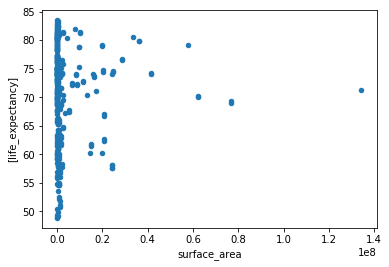

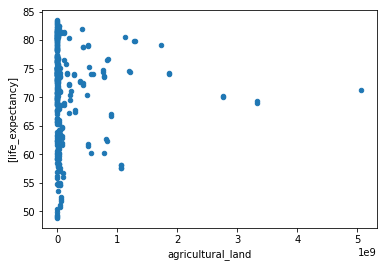

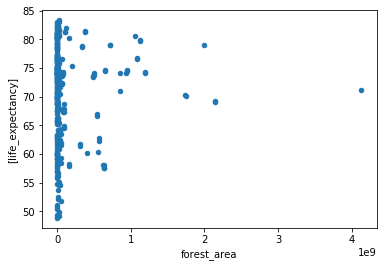

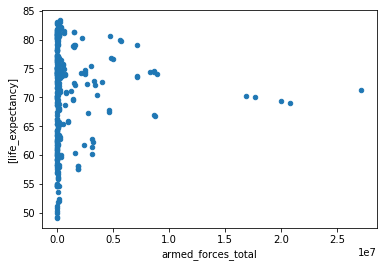

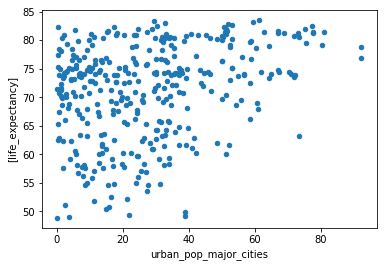

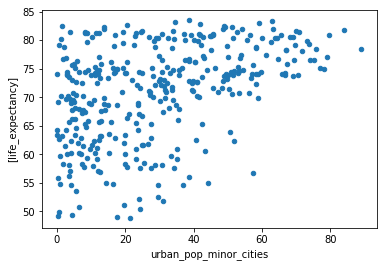

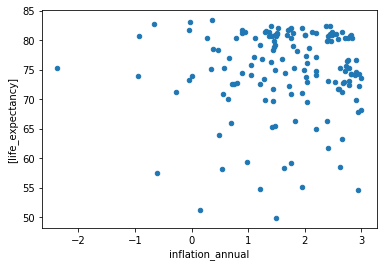

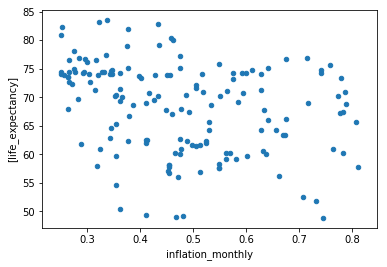

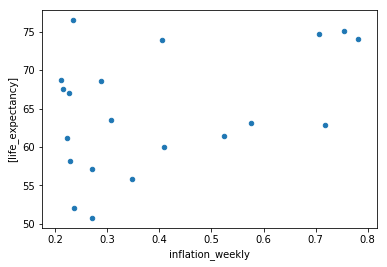

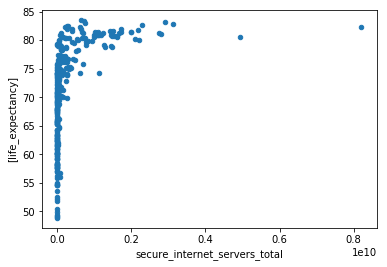

In [67]:

for var in numeric_var:
    data = pd.concat([df[target_var], df[var]], axis=1)
    data.plot.scatter(x=var, y=target_var);

### 3.2 Histogram plot of target variable vs categorical variables

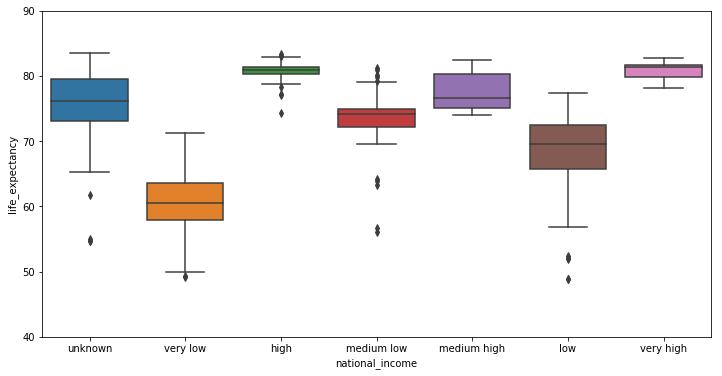

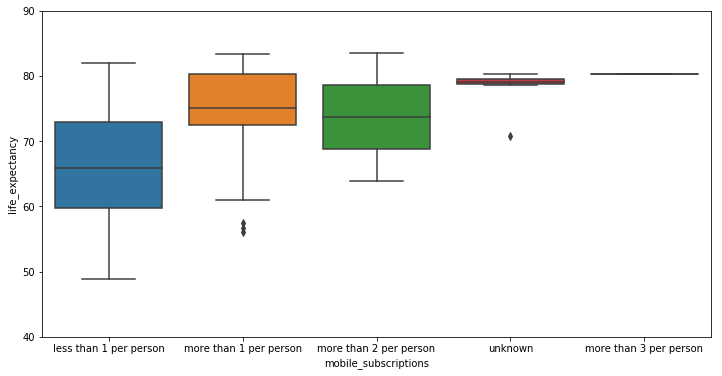

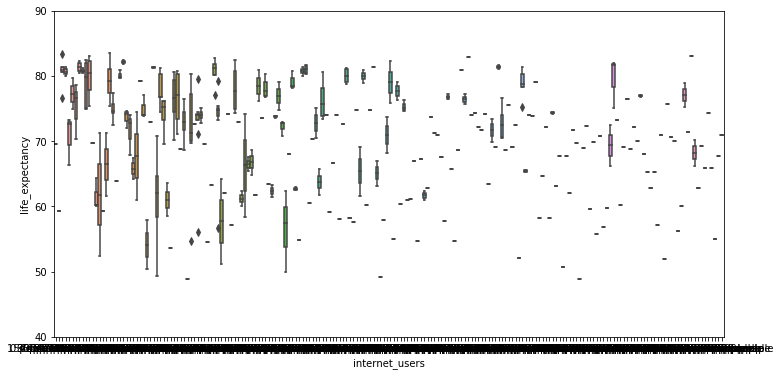

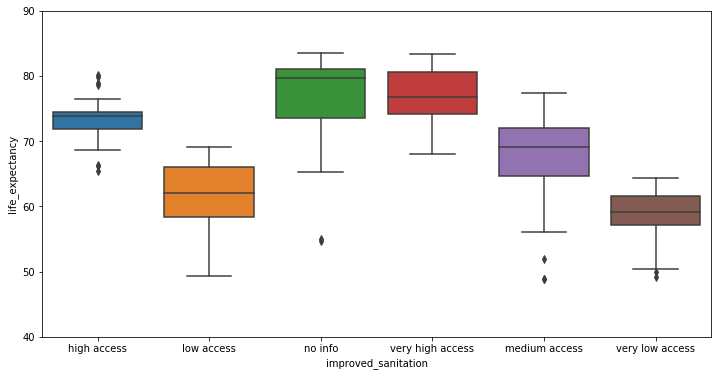

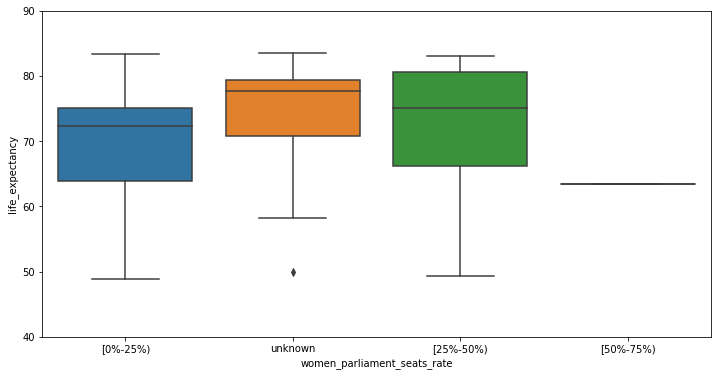

In [79]:

for var in categorical_var:
    data = pd.concat([df[target_var], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(12, 6))
    fig = sns.boxplot(x=var, y="life_expectancy", data=data)
    fig.axis(ymin=40, ymax=90);

### 3.3 Histogram plot

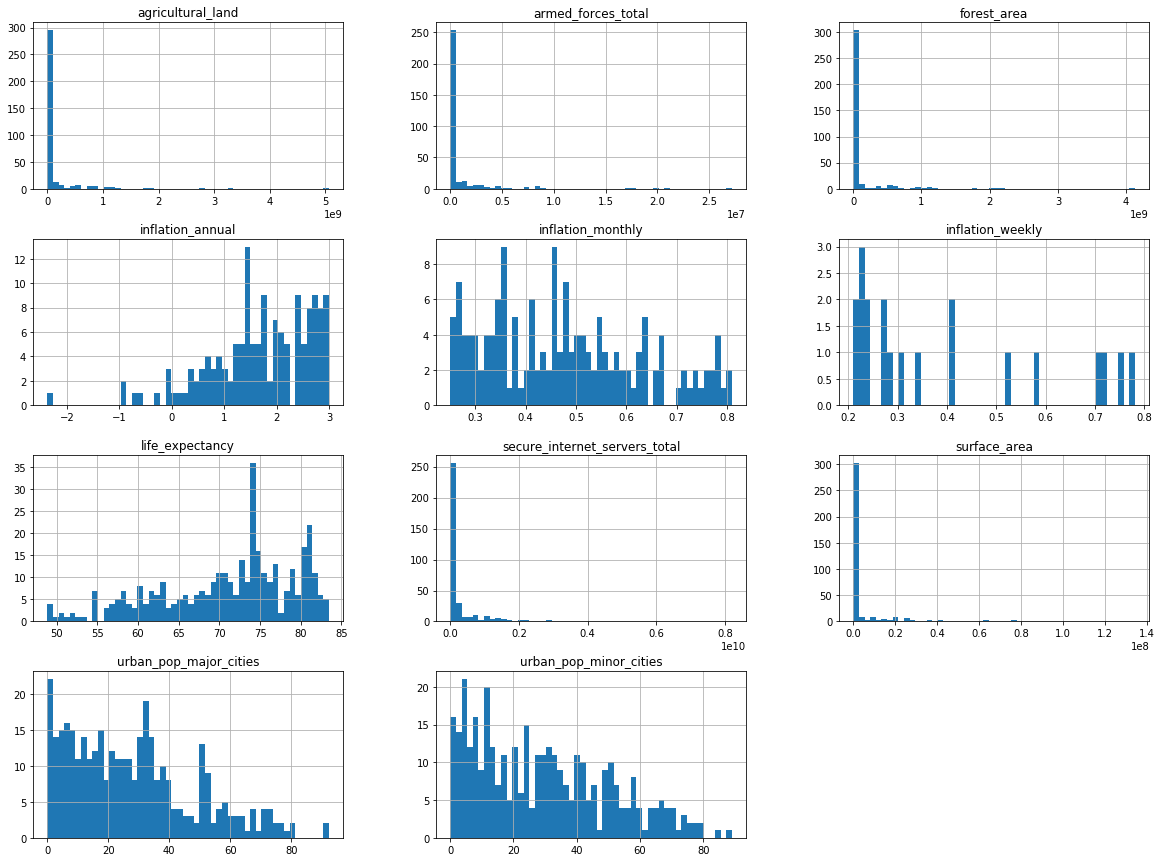

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

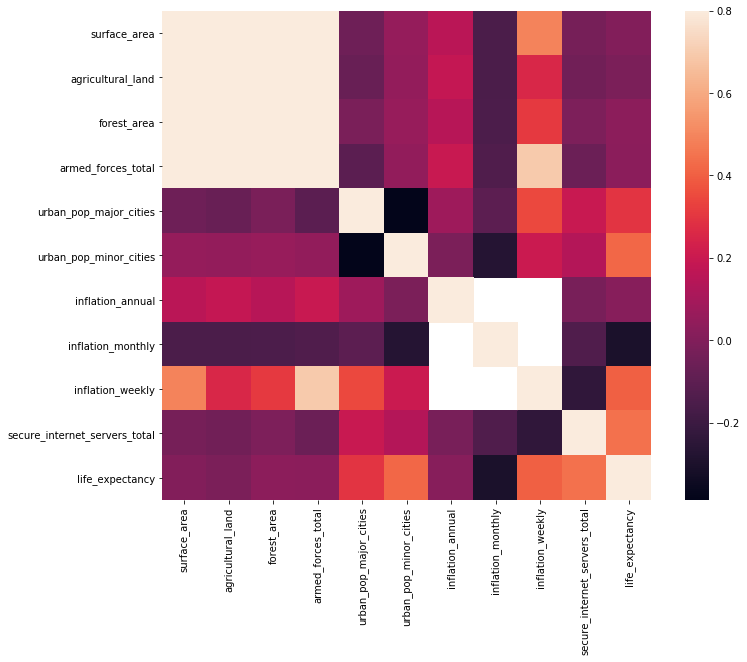

In [80]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## 4. Data wrangling

### 4.1 Missing value detection

In [83]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
inflation_weekly,342,0.944751
inflation_annual,216,0.596685
inflation_monthly,206,0.569061
armed_forces_total,44,0.121547
secure_internet_servers_total,10,0.027624
forest_area,5,0.013812
agricultural_land,4,0.011050
urban_pop_minor_cities,2,0.005525
urban_pop_major_cities,2,0.005525
life_expectancy,0,0.000000


### 4.2 Outlier detection

In [ ]:
#standardizing data
df_labels_scaled = StandardScaler().fit_transform(df_labels['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

###  transformation

### imputating

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer 
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#housing_num_tr = num_pipeline.fit_transform(housing_num)

In [98]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, target_var),
        ("cat", OneHotEncoder(), categorical_var),
    ])

df_prepared = full_pipeline.fit_transform(df)

In [100]:
df_prepared.shape

(362, 221)

### summarization

### normalization

###  outlier/anomaly detection

### Target variable vs numeric variables

## Model training

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    

from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(df_prepared, df_labels)

df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse





forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(forest_scores)
display_scores(forest_rmse_scores)

/Users/yashu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/Users/yashu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yashu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yashu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 

Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean: nan
Standard deviation: nan


/Users/yashu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yashu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yashu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yashu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value

## Model predictions

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

## Model explainability